In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [2]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [3]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)


In [4]:
all_features.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CHILD_DEPENDENTS_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,EDUCATION_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,HEALTHCARE_MEDICAL_coef_variation,HOME_IMPROVEMENT_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PENSION_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,UNEMPLOYMENT_BENEFITS_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CHILD_DEPENDENTS_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,EDUCATION_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,HEALTHCARE_MEDICAL_count,HOME_IMPROVEMENT_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PENSION_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,UNEMPLOYMENT_BENEFITS_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CHILD_DEPENDENTS_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,EDUCATION_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,HEALTHCARE_MEDICAL_iqr,HOME_IMPROVEMENT_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PENSION_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,UNEMPLOYMENT_BENEFITS_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CHILD_DEPENDENTS_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,EDUCATION_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,HEALTHCARE_MEDICAL_median,HOME


Logistic Regression Results
ROC-AUC: 0.761 | Accuracy: 0.759
Training Time: 1.4s
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86      2416
         1.0       0.17      0.62      0.27       186

    accuracy                           0.76      2602
   macro avg       0.57      0.69      0.56      2602
weighted avg       0.91      0.76      0.81      2602


Random Forest Results
ROC-AUC: 0.794 | Accuracy: 0.915
Training Time: 21.1s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2416
         1.0       0.26      0.10      0.14       186

    accuracy                           0.92      2602
   macro avg       0.60      0.54      0.55      2602
weighted avg       0.89      0.92      0.90      2602

[LightGBM] [Info] Number of positive: 9570, number of negative: 9570
[LightGBM] [Info] Total Bins 76345
[LightGBM] [Info] Number of data points in the train set: 19140, number of used fea

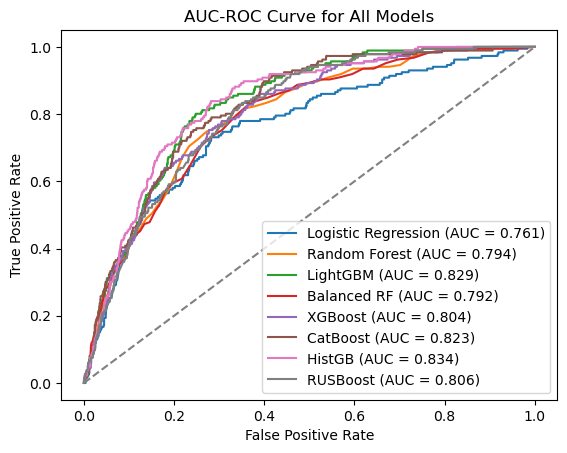

In [5]:
classification_features = (all_features.drop(columns = ['prism_consumer_id', 'evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [64]:
best_features = classify.get_best_features(classification_features, "DQ_TARGET", all_features)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Logistic Regression Results
ROC-AUC: 0.787 | Accuracy: 0.723
Training Time: 0.3s
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      1785
         1.0       0.17      0.68      0.28       151

    accuracy                           0.72      1936
   macro avg       0.57      0.70      0.55      1936
weighted avg       0.90      0.72      0.79      1936


Random Forest Results
ROC-AUC: 0.786 | Accuracy: 0.880
Training Time: 8.2s
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1785
         1.0       0.29      0.36      0.32       151

    accuracy                           0.88      1936
   macro avg       0.62      0.64      0.63      1936
weighted avg       0.89      0.88      0.89      1936

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 6814, number of negative: 6814
[Li

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:34:38] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.779 | Accuracy: 0.902
Training Time: 0.7s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1785
         1.0       0.31      0.21      0.25       151

    accuracy                           0.90      1936
   macro avg       0.62      0.58      0.60      1936
weighted avg       0.89      0.90      0.89      1936


CatBoost Results
ROC-AUC: 0.777 | Accuracy: 0.903
Training Time: 9.0s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1785
         1.0       0.34      0.25      0.29       151

    accuracy                           0.90      1936
   macro avg       0.64      0.61      0.62      1936
weighted avg       0.89      0.90      0.90      1936


HistGB Results
ROC-AUC: 0.779 | Accuracy: 0.899
Training Time: 1.6s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1785
         1.0       0.31    

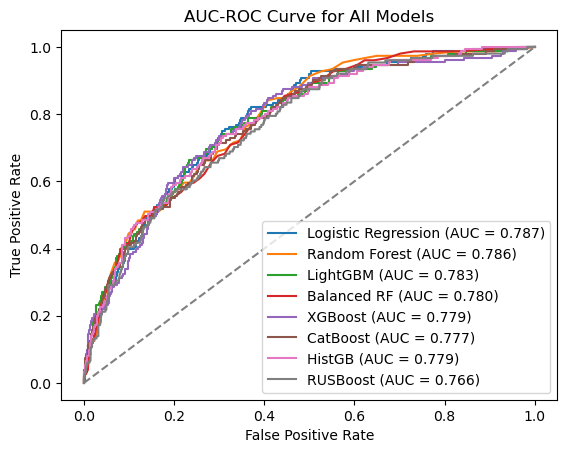

In [65]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)